# Hausaufgabe 4

### Abgage via studip bis spätestens 05.06. 12:00 Uhr (zur VL)! 
### Verteidigung 08.06. 08:00-10:00 Uhr (Timeslots werden vorher bekannt gegeben)!


- In jedem Blatt kann maximal 5% Bonus erreicht werden, falls:
    - Mind. 60% des Arbeitsblatts korrekt bearbeitet wurde und
    - das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.
    - Bonus % = 5% * Teil der Hausaufgabe erfolgreich verteidigt
    - Erfolgreiche Verteidigung: Ein von uns ausgewähltes Team-Mitglied erklärt die Lösung und beantwortet Fragen dazu.
    - ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
    - Code muss ohne Hilfsmittel erläutert werden
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Aufgabe 1: Pandas Basics (14%)

#### 1. (2%) Importieren Sie die csv-Datei "tips" von https://github.com/mwaskom/seaborn-data.

In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url)

#### 2. (2%) Wie viele Spalten und Zeilen hat dieser dataframe?

In [3]:
# Format: (Zeilen, Spalten)
tips.shape

(244, 7)

#### 3. (2%) Was sind die Spalten des dataframe?

In [4]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

#### 4. (2%) Wie viele numerische und nicht-numerische Spalten enthält es?

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = tips.select_dtypes(include=numerics).columns.tolist()
non_numeric_columns = tips.select_dtypes(exclude=numerics).columns.tolist()
print(f"{len(numeric_columns)} numerische Spalten:\n{numeric_columns}\n")
print(f"{len(non_numeric_columns)} nicht-numerische Spalten:\n{non_numeric_columns}")

3 numerische Spalten:
['total_bill', 'tip', 'size']

4 nicht-numerische Spalten:
['sex', 'smoker', 'day', 'time']


Quelle: https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas

#### 5. (2%) Wie hoch ist der durchschnittliche Betrag der Gesamtrechnung?

In [6]:
tips['total_bill'].mean()

19.78594262295082

#### 6. (2%) Untersuchen Sie mit Hilfe der Visualisierung, ob es Zusammenhänge zwischen der Höhe des Trinkgeldes (tip) und der Gesamtrechnung gibt.

<Axes: xlabel='tip', ylabel='total_bill'>

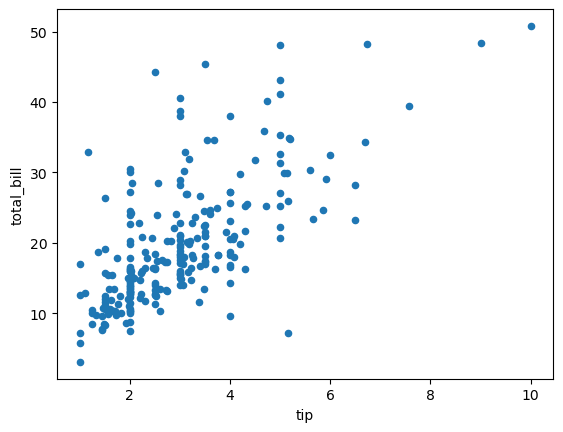

In [7]:
tips.plot.scatter(x='tip', y='total_bill')

#### 7. (2%) Geben Frauen mehr Trinkgeld als Männer? - Wie hoch ist der Mittelwert der Trinkgelder von Männern und Frauen?

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

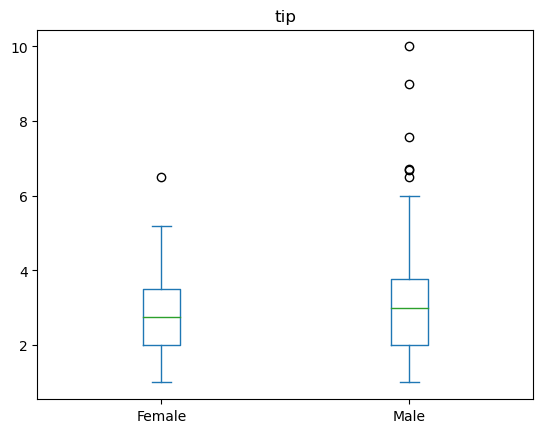

In [8]:
tips.plot.box(column='tip', by='sex')
tips.groupby(['sex'])['tip'].mean()

Quellen:
- https://www.statology.org/pandas-mean-by-group/
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#box-plots

---

## Aufgabe 2: Data Preprocessing (26%)

Sie erhalten eine csv-Datei mit Daten, die bereinigt werden muss, bevor wir sie für die weitere Analyse verwenden können.

Schauen Sie sich die Datei in einem csv-Viewer Ihrer Wahl an (z.B. die integrierte Lösung in jupyter-lab oder Microsoft Excel).
Was fällt Ihnen auf? 

#### a) (5%) Weniger als die Hälfte der Datei wird korrekt angezeigt. Schreiben Sie ein Bash-Skript, um die Datei in eine richtige csv-Datei zu konvertieren (so dass alle Zeilen richtig angezeigt werden). 

Tipp: Nützliche Befehle sind `sed`, `head` und `tail`.

In [9]:
%%bash

input_file="titanic.csv"
sed -i 's/;/,/g' "$input_file"

#### b) (1%) Laden Sie die Daten in einen Pandas DataFrame

In [10]:
file_path = "titanic.csv"
titanic = pd.read_csv(file_path)

#### c) (4%) Beachten Sie, dass es in der Spalte "Sex" eine Vielzahl von Möglichkeiten gibt, zwischen männlich und weiblich zu unterscheiden (dieser Datensatz ist auf diese beiden Optionen beschränkt). Finden Sie alle unterschiedlichen Werte, die in dieser Spalte verwendet werden.

In [11]:
titanic["Sex"].unique()

array(['male', '1', 'female', 'Male', '-1', 'mle', 'Female', 'mal',
       'femal', 'femaale', 'femalle', 'm', 'f', 'femae'], dtype=object)

#### d) (8%) Verwenden Sie Pandas, um alle Einträge in dieser Spalte in "m" bzw. "f" umzuwandeln.  

In [12]:
# Der Wert -1 scheint m zu sein
titanic["Sex"] = titanic["Sex"].replace(to_replace=['male', 'Male', '-1', 'mle', 'mal', 'm'], value="m")
titanic["Sex"] = titanic["Sex"].replace(to_replace=['1', 'female', 'Female', 'femal', 'femaale', 'femalle', 'f', 'femae'], value="f")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,NaN,S


#### e) (8%) Bereinigen Sie die Spalte "Name". Entfernen Sie `Mr.`, `Mrs.`, `Master`,... Verwenden Sie den in Klammern angegebenen Namen, falls vorhanden.

In [13]:
def remove_second_word(text):
    words = text.split()
    # Achtung! diese Zelle darf nicht mehrfach ausgeführt werden, weil der Index des Titels gehardcoded ist
    # Um die Zelle neu auszuführen sollten alle Zellen von Beginn an erneut ausgeführt werden
    del words[1]
    return ' '.join(words)

titanic['Name'] = titanic['Name'].apply(lambda x: remove_second_word(x))

def extract_text_between_brackets(text):
    start = text.find('(')
    end = text.find(')')
    # Wenn ein ( und ) im String existiert
    if start != -1 and end != -1:
        return text[start + 1:end]
    # Wenn der String keine Klammern enthält
    else:
        return text

titanic['Name'] = titanic['Name'].apply(lambda x: extract_text_between_brackets(x))

titanic["Name"]

0                     Braund, Owen Harris
1                  Florence Briggs Thayer
2                        Heikkinen, Laina
3                           Lily May Peel
4                    Allen, William Henry
                      ...                
886                      Montvila, Juozas
887                Graham, Margaret Edith
888    Johnston, Catherine Helen "Carrie"
889                     Behr, Karl Howell
890                       Dooley, Patrick
Name: Name, Length: 891, dtype: object

Quelle: ChatGPT

## Aufgabe 3: Seaborn Plotting (60%)

#### 1. (0%) Laden Sie den Titanic-Datensatz als Pandas DataFrame

In [14]:
# Den Originalen Datensatz?
file_path = "titanic.csv"
data = pd.read_csv(file_path)
# Mit dem bereinigten Datensatz weiterarbeiten macht mehr Sinn

#### 2. Beantworten Sie die folgenden Fragen mit Hilfe von Diagrammen:

#### a. (10%) Wie ist die Verteilung des Alters der Passagiere?

<Axes: xlabel='Age', ylabel='Count'>

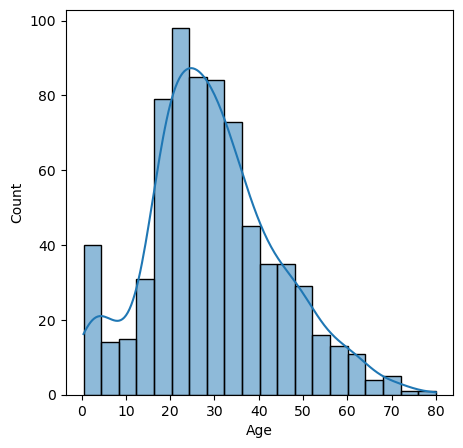

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=titanic, x="Age", ax=ax, kde=True)

#### b. (10%) Waren die Passagiere im Allgemeinen jünger als der Durchschnitt oder älter? Visualisieren Sie Ihre Ergebnisse!

Median: 28.0
Mean: 29.69911764705882


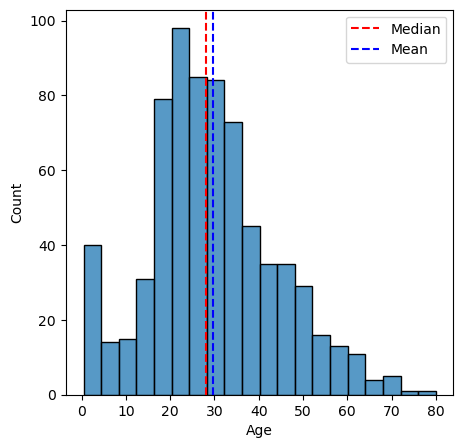

In [16]:
median_age = titanic['Age'].median()
mean_age = titanic['Age'].mean()
print(f"Median: {median_age}")
print(f"Mean: {mean_age}")

fig, ax = plt.subplots(figsize=(5, 5))
g = sns.histplot(data=titanic, x="Age", ax=ax)
g.axvline(median_age, color='red', linestyle='--', label='Median')
g.axvline(mean_age, color='blue', linestyle='--', label='Mean')
g.legend()

#### c. (10%) Ändert sich das Ergebnis in (b) für Männer und Frauen?

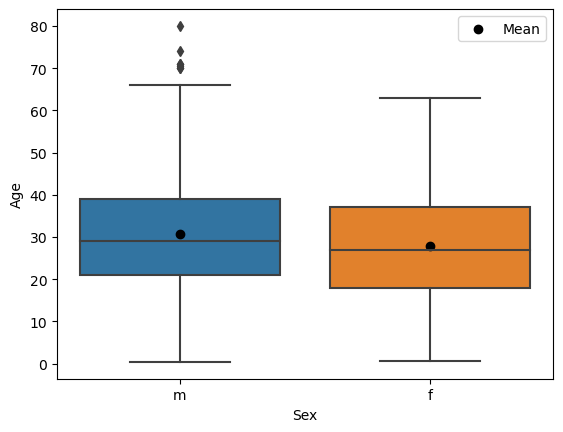

In [79]:
mean_m = titanic.loc[titanic['Sex'] == 'm', 'Age'].mean()
mean_f = titanic.loc[titanic['Sex'] == 'f', 'Age'].mean()
mean = [mean_m, mean_f]
g = sns.boxplot(data=titanic, x='Sex', y='Age')
plt.scatter(x='m',y=mean_m, marker='o', color="black", label="Mean")
plt.scatter(x='f',y=mean_f, marker='o', color="black")
plt.legend()

#### d. (10%) Welches Geschlecht hatte eine höhere Überlebensrate?

Sex
f    0.742038
m    0.188908
Name: Survived, dtype: float64

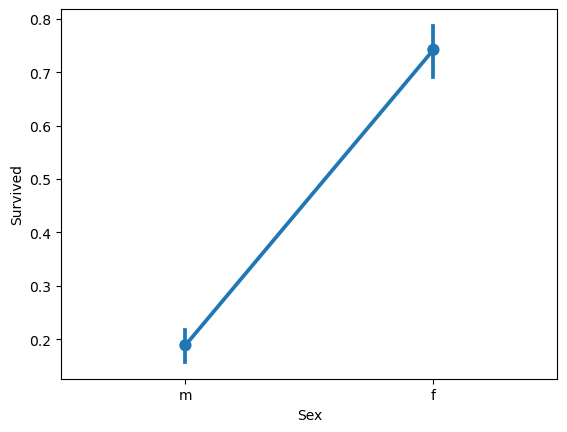

In [35]:
g = sns.pointplot(data=titanic, x='Sex', y='Survived')
titanic.groupby(['Sex'])['Survived'].mean()

#### e. (10%) Wie hoch ist der durchschnittliche Fahrpreis (fare) für jede Klasse? 

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

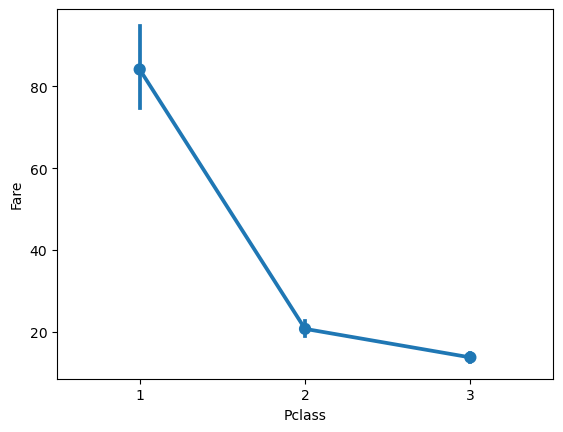

In [76]:
g = sns.pointplot(data=titanic, x="Pclass", y="Fare")
titanic.groupby(['Pclass'])['Fare'].mean()

#### f. (10%) Welche Fahrkartenklasse hatte eine höhere Überlebensrate?

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

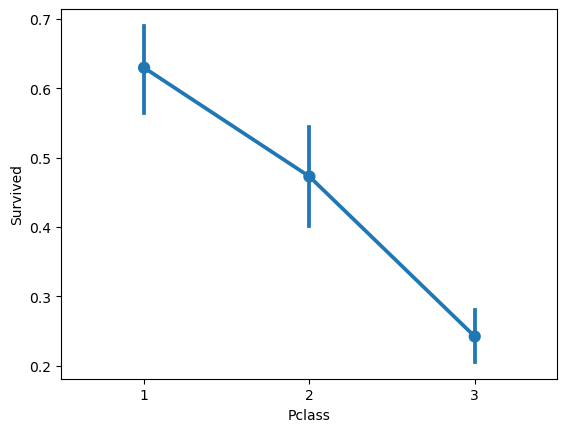

In [77]:
g = sns.pointplot(data=titanic, x="Pclass", y="Survived")
titanic.groupby(['Pclass'])['Survived'].mean()